In [4]:
!pip install yfinance

     ---------------------------------------- 0.0/948.2 kB ? eta -:--:--
     ---------------------------------------- 0.0/948.2 kB ? eta -:--:--
     ----------- ---------------------------- 262.1/948.2 kB ? eta -:--:--
     ----------- ---------------------------- 262.1/948.2 kB ? eta -:--:--
     ------------------- ---------------- 524.3/948.2 kB 762.0 kB/s eta 0:00:01
     ------------------- ---------------- 524.3/948.2 kB 762.0 kB/s eta 0:00:01
     ----------------------------- ------ 786.4/948.2 kB 714.3 kB/s eta 0:00:01
     ----------------------------- ------ 786.4/948.2 kB 714.3 kB/s eta 0:00:01
     ------------------------------------ 948.2/948.2 kB 627.2 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): fi

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [9]:
stock_symbol = 'INFY.NS'  # Replace with your desired stock symbol
start_date = '2024-01-01'
end_date = '2025-01-20'
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)
stock_data

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,INFY.NS,INFY.NS,INFY.NS,INFY.NS,INFY.NS
Date,,,,,
2024-01-01,1525.288452,1530.843560,1509.458944,1513.145947,2808451
2024-01-02,1508.623291,1523.125502,1497.414778,1520.028396,5396313
2024-01-03,1464.969116,1494.415931,1463.002715,1494.415931,7550363
2024-01-04,1487.287720,1494.219333,1467.820417,1479.667914,7056038
2024-01-05,1506.804443,1513.834233,1480.946214,1481.437815,8895403
...,...,...,...,...,...
2025-01-13,1962.199951,1982.800049,1949.000000,1956.000000,5804152
2025-01-14,1940.050049,1971.800049,1931.099976,1968.849976,5792162


In [13]:
stock_data['Return'] = (stock_data['Close'] - stock_data['Open'])/stock_data['Open']

In [14]:
stock_data

Price,Close,High,Low,Open,Volume,Return
Ticker,INFY.NS,INFY.NS,INFY.NS,INFY.NS,INFY.NS,
Date,,,,,,
2024-01-01,1525.288452,1530.843560,1509.458944,1513.145947,2808451,0.008025
2024-01-02,1508.623291,1523.125502,1497.414778,1520.028396,5396313,-0.007503
2024-01-03,1464.969116,1494.415931,1463.002715,1494.415931,7550363,-0.019705
2024-01-04,1487.287720,1494.219333,1467.820417,1479.667914,7056038,0.005150
2024-01-05,1506.804443,1513.834233,1480.946214,1481.437815,8895403,0.017123
...,...,...,...,...,...,...
2025-01-13,1962.199951,1982.800049,1949.000000,1956.000000,5804152,0.003170
2025-01-14,1940.050049,1971.800049,1931.099976,1968.849976,5792162,-0.014628


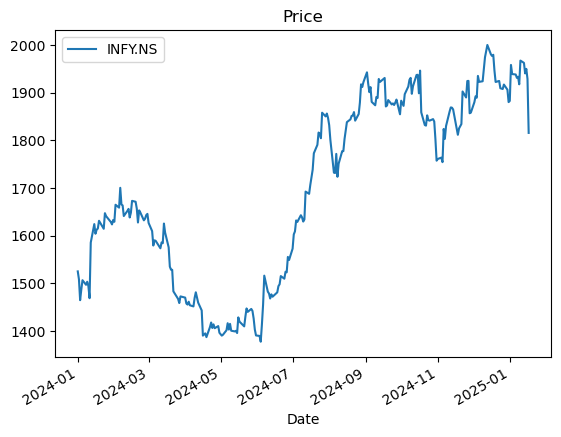

In [16]:
ax1 = stock_data['Close'].plot(style='-')  # A solid line for the plot
plt.title('Price')
ax1.legend()
plt.show()

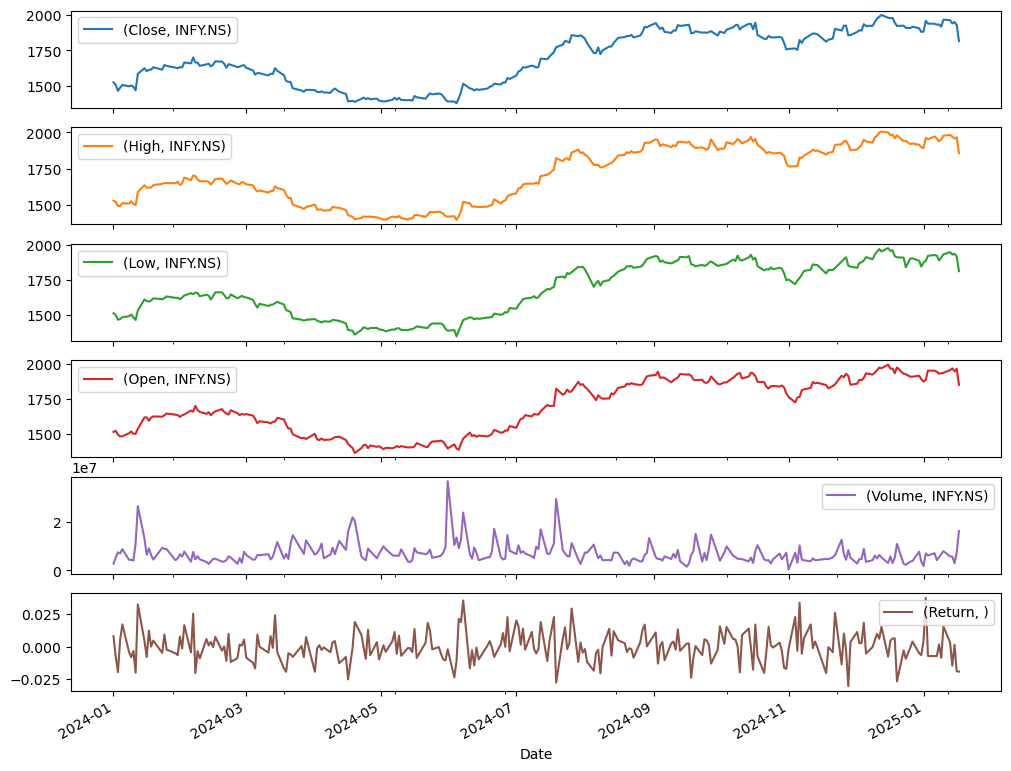

In [19]:
stock_data.plot(subplots=True, figsize=(12, 10))
plt.show()

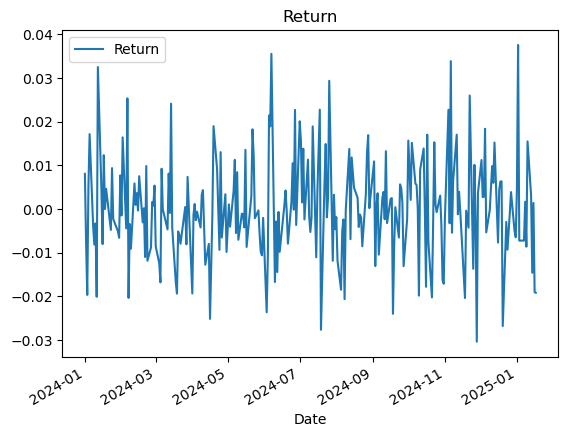

In [20]:
ax1 = stock_data['Return'].plot(style='-')  # A solid line for the plot
plt.title('Return')
ax1.legend()
plt.show()

<Axes: >

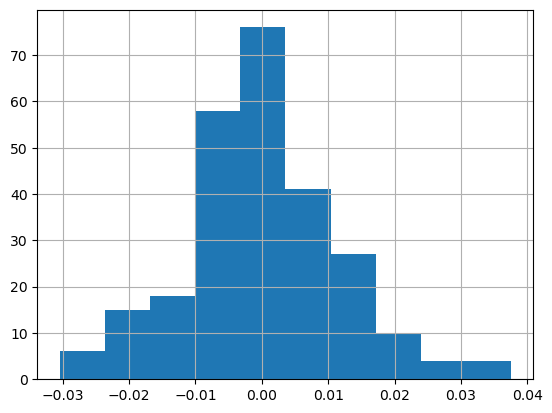

In [23]:
stock_data['Return'].hist()

<Axes: ylabel='Density'>

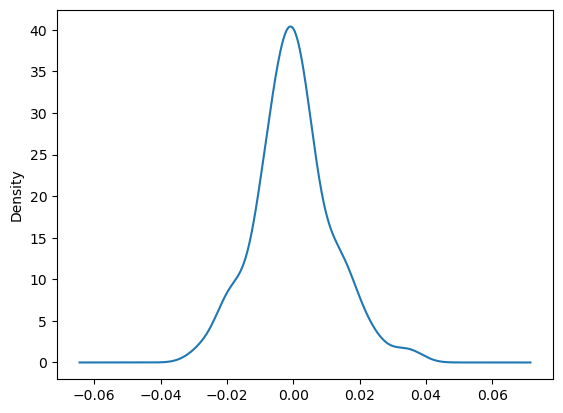

In [22]:
stock_data['Return'].plot(kind='kde')

<Axes: ylabel='Return'>

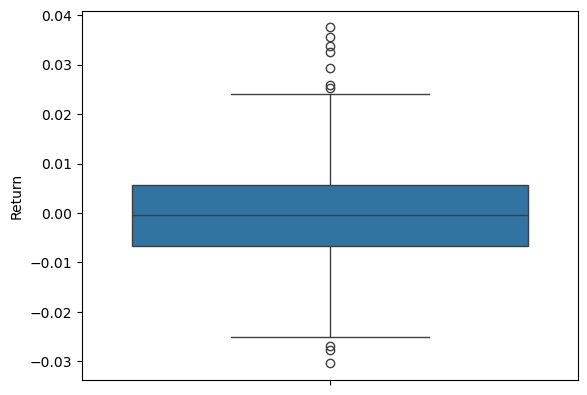

In [24]:
sns.boxplot(stock_data['Return'])

In [26]:
stock_data['Return'].diff(1)

Date
2024-01-01         NaN
2024-01-02   -0.015528
2024-01-03   -0.012201
2024-01-04    0.024854
2024-01-05    0.011973
                ...   
2025-01-13   -0.012292
2025-01-14   -0.017798
2025-01-15    0.015989
2025-01-16   -0.020436
2025-01-17   -0.000131
Name: Return, Length: 259, dtype: float64

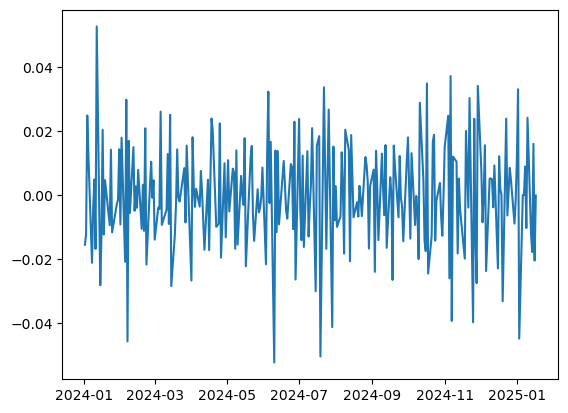

In [27]:
plt.plot(stock_data['Return'].diff(1))

In [28]:
#resample data to weekly data
Weekly = stock_data.resample('W').mean()

In [30]:
Weekly.head()

Price,Close,High,Low,Open,Volume,Return
Ticker,INFY.NS,INFY.NS,INFY.NS,INFY.NS,INFY.NS,
Date,,,,,,
2024-01-07,1498.594604,1511.287712,1483.728614,1497.739200,6.341314e+06,0.000618
2024-01-14,1509.989990,1527.392621,1491.731932,1510.727367,1.019991e+07,-0.000630
2024-01-21,1617.493042,1627.285731,1603.334975,1613.284962,7.967460e+06,0.002635
2024-01-28,1634.292684,1650.220528,1619.233302,1633.080046,9.088747e+06,0.000740
2024-02-04,1635.918237,1658.089414,1622.143585,1632.398398,5.926400e+06,0.002161


In [31]:
Quarterly = stock_data.resample('Q').mean()

C:\Users\prana\AppData\Local\Temp\ipykernel_25484\1672698792.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  Quarterly = stock_data.resample('Q').mean()


In [32]:
Quarterly

Price,Close,High,Low,Open,Volume,Return
Ticker,INFY.NS,INFY.NS,INFY.NS,INFY.NS,INFY.NS,
Date,,,,,,
2024-03-31,1594.124843,1609.251385,1579.598878,1595.407103,6.723295e+06,-0.000797
2024-06-30,1442.212807,1454.899789,1430.616485,1442.669535,8.958085e+06,-0.000262
2024-09-30,1810.656294,1826.693999,1792.845811,1809.591845,7.055611e+06,0.000759
2024-12-31,1885.036062,1904.051586,1864.952617,1883.302015,5.408632e+06,0.000996
2025-03-31,1927.769221,1949.688467,1908.503850,1930.830764,6.575154e+06,-0.001512


In [33]:
Hourly = stock_data.resample('H').mean()

C:\Users\prana\AppData\Local\Temp\ipykernel_25484\2511533272.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  Hourly = stock_data.resample('H').mean()


In [34]:
Hourly

Price,Close,High,Low,Open,Volume,Return
Ticker,INFY.NS,INFY.NS,INFY.NS,INFY.NS,INFY.NS,
Date,,,,,,
2024-01-01 00:00:00,1525.288452,1530.84356,1509.458944,1513.145947,2808451.0,0.008025
2024-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2025-01-16 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-16 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
Yearly = stock_data.resample('Y').mean()
Yearly

C:\Users\prana\AppData\Local\Temp\ipykernel_25484\2425640548.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  Yearly = stock_data.resample('Y').mean()


Price,Close,High,Low,Open,Volume,Return
Ticker,INFY.NS,INFY.NS,INFY.NS,INFY.NS,INFY.NS,
Date,,,,,,
2024-12-31,1686.725600,1702.474328,1670.659008,1686.435778,7.023484e+06,0.000190
2025-12-31,1927.769221,1949.688467,1908.503850,1930.830764,6.575154e+06,-0.001512


In [36]:
Monthly = stock_data.resample('M').mean()
Monthly

C:\Users\prana\AppData\Local\Temp\ipykernel_25484\4121629473.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  Monthly = stock_data.resample('M').mean()


Price,Close,High,Low,Open,Volume,Return
Ticker,INFY.NS,INFY.NS,INFY.NS,INFY.NS,INFY.NS,
Date,,,,,,
2024-01-31,1567.559123,1582.499086,1552.511468,1566.678916,7.896341e+06,0.000536
2024-02-29,1652.655134,1666.040705,1636.359761,1652.493610,4.841610e+06,0.000146
2024-03-31,1556.832845,1574.208193,1544.979827,1562.322396,7.550042e+06,-0.003452
2024-04-30,1432.073688,1447.038011,1422.907825,1435.741031,9.272678e+06,-0.002435
2024-05-31,1414.553368,1425.214918,1404.181120,1413.994648,8.328432e+06,0.000426
2024-06-30,1483.456524,1495.984939,1467.948898,1481.655992,9.322867e+06,0.001264
2024-07-31,1719.283125,1732.530016,1697.980223,1712.269780,8.750878e+06,0.004344
2024-08-31,1822.291626,1837.756032,1805.600724,1823.421623,5.936690e+06,-0.000700


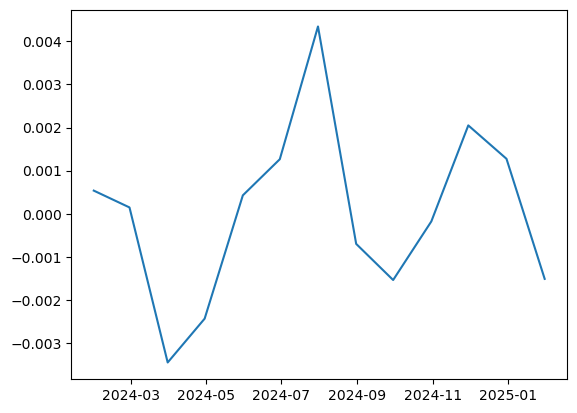

In [38]:
plt.plot(Monthly['Return'])

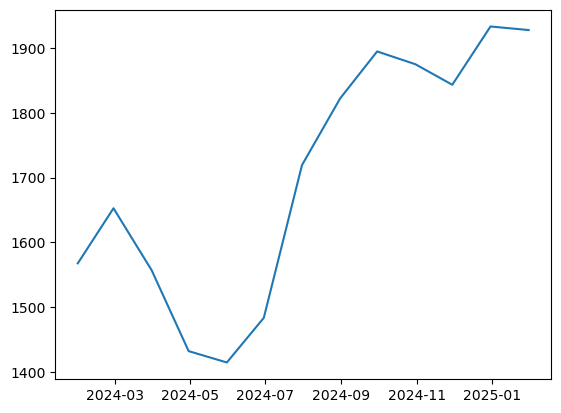

In [39]:
plt.plot(Monthly['Close'])